<a href="https://colab.research.google.com/github/Viviankatheu/Hass-Consult-Company-Project/blob/main/Vivian_Katheu_Moringa_Week_7_Core_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hass Consult Housing Price Analysis

##1.Defining the Question

To analyze the housing prices and create a model that accurately predicts future prices using information given on the real estate properties under Hass Consulting Company.

###a)Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

###b)Defining the Metric for Success

This project will be successful when we accurately predict the house prices based on the current information provided on the real estate properties. 

I hope to achieve atleast 80% accuracy with the models and have the lowest RMSE score possible. The best model with the highest accuracy score will be the one we go with.

###c)Understanding the Context

HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards. This project aims to analyse the current housing prices and create a model that will accurately predict future prices with an aim to achieve the company's goal to provide top notch services.

###d)Recording the Experimental Design

1. To specify the question

2. Find and deal with outliers and other anomalies such as missing data and duplicates

3. Perform exploratory data analysis on the dataset. I will do both univariate and bivariate analysis.

4. Use mulitilinear, ridge, lasso and elastic net regression models to predict the prices.

5. Use cross validation to make the most of our data.

6. Draw a conclusion

###e)Data Relevance

The data is relevant because it provides us with adequate information to predict the prices of the houses. We'll drop the columns we don't need.

##2.Reading the Data

In [1]:
#Importing the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our dataset
hass = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
hass

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


##3.Checking the Data

In [3]:
#Previewing the top of our dataset
hass.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Previewing the bottom of our dataset
hass.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#Checking the shape of our dataset
hass.shape

(21613, 20)

In [6]:
#Checking the data types of our dataset
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
hass.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##4.External Datasource Validation

##5.Tidying the Dataset

In [8]:
#Checking for missing values

hass.isnull().sum()
#There are no missing values in our dataset

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#Checking for duplicates

hass.duplicated().sum()

3

In [10]:
#We shall drop the duplicates since there are extremely few
hass.drop_duplicates(inplace=True)

In [11]:
hass.duplicated().sum()

0

In [12]:
#Dropping the unnecessary columns
hass.drop(columns = ['id'],axis =1, inplace = True)
hass.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
hass.shape

(21610, 19)

In [14]:
#Changing the datatypes for our columns
hass['price'] = hass.price.astype(int)
hass['bathrooms'] = hass.bathrooms.astype(int)
hass['floors'] = hass.floors.astype(int)

In [15]:
hass.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


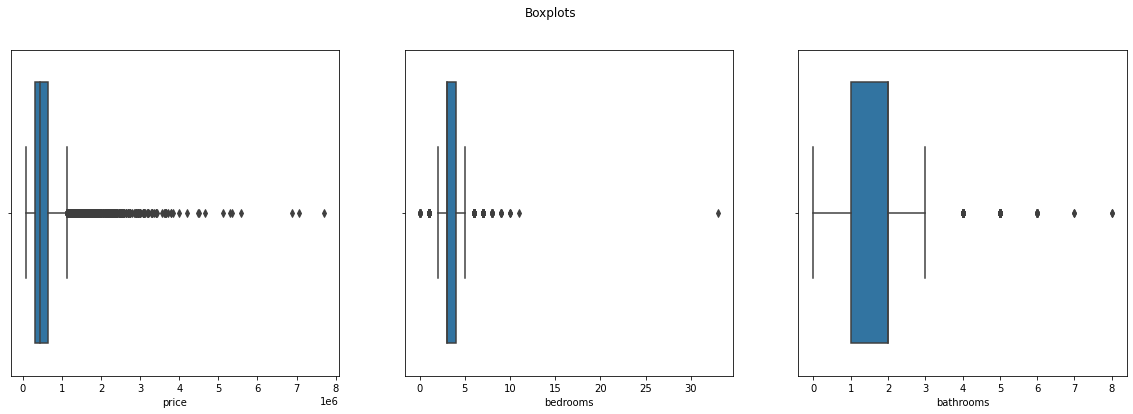

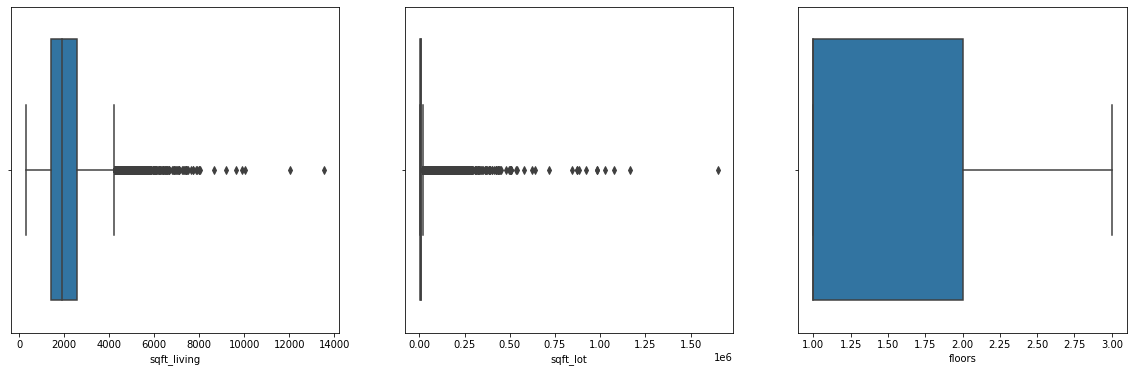

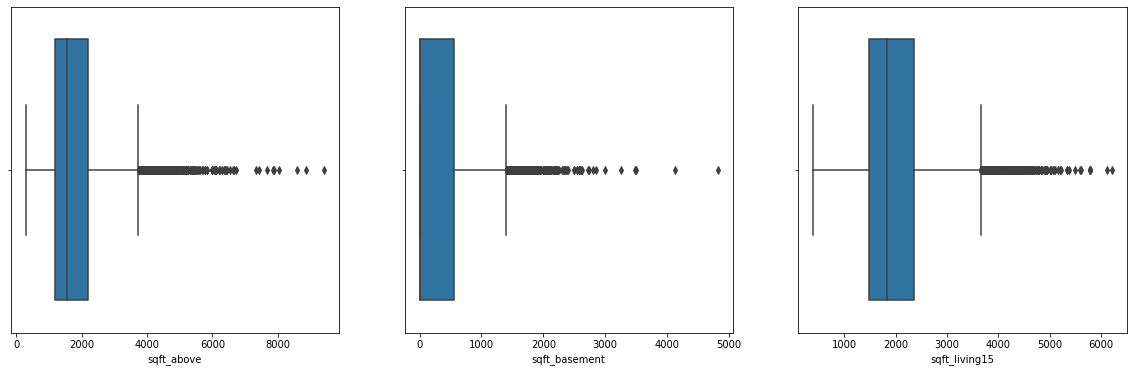

In [16]:
#Checking for outliers

fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = hass['price'], ax=ax1)
sns.boxplot(x = hass['bedrooms'], ax=ax2)
sns.boxplot(x = hass['bathrooms'], ax=ax3)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = hass['sqft_living'], ax=ax4)
sns.boxplot(x = hass['sqft_lot'], ax=ax5)
sns.boxplot(x = hass['floors'], ax=ax6)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = hass['sqft_above'], ax=ax7)
sns.boxplot(x = hass['sqft_basement'], ax=ax8)
sns.boxplot(x = hass['sqft_living15'], ax=ax9)

##6.Exploratory Data Analysis

###Univariate Analysis

####Measures of central tendency

In [17]:
print("The mean for price column is: ", int(hass['price'].mean()))
print("The mode for price column is: ",int(hass['price'].mode()[0]))
print("The median for price column is: ",int(hass['price'].median()))

The mean for price column is:  540178
The mode for price column is:  350000
The median for price column is:  450000


####Measures of Dispersion

In [18]:
hass['price'].std()

367387.58505388984

In [19]:
hass['price'].kurt()

34.517437729615054

In [20]:
hass['price'].skew()

4.021467451317612

####Count Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


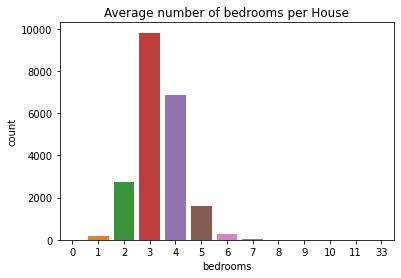

In [21]:
#Plotting countplots
sns.countplot(hass['bedrooms'], palette ='tab10')
plt.title('Average number of bedrooms per House')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


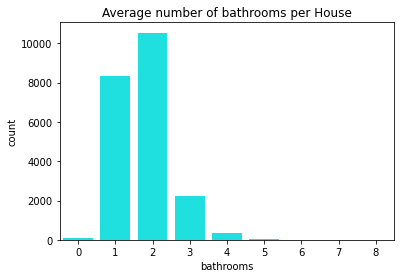

In [22]:
sns.countplot(hass['bathrooms'], color = 'cyan')
plt.title('Average number of bathrooms per House')
plt.show()

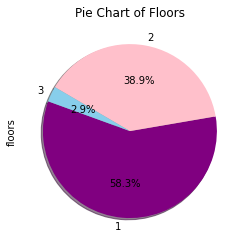

In [23]:
colors = [ 'purple','pink','skyblue']
hass['floors'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of Floors')
plt.show()

###Bivariate Analyis

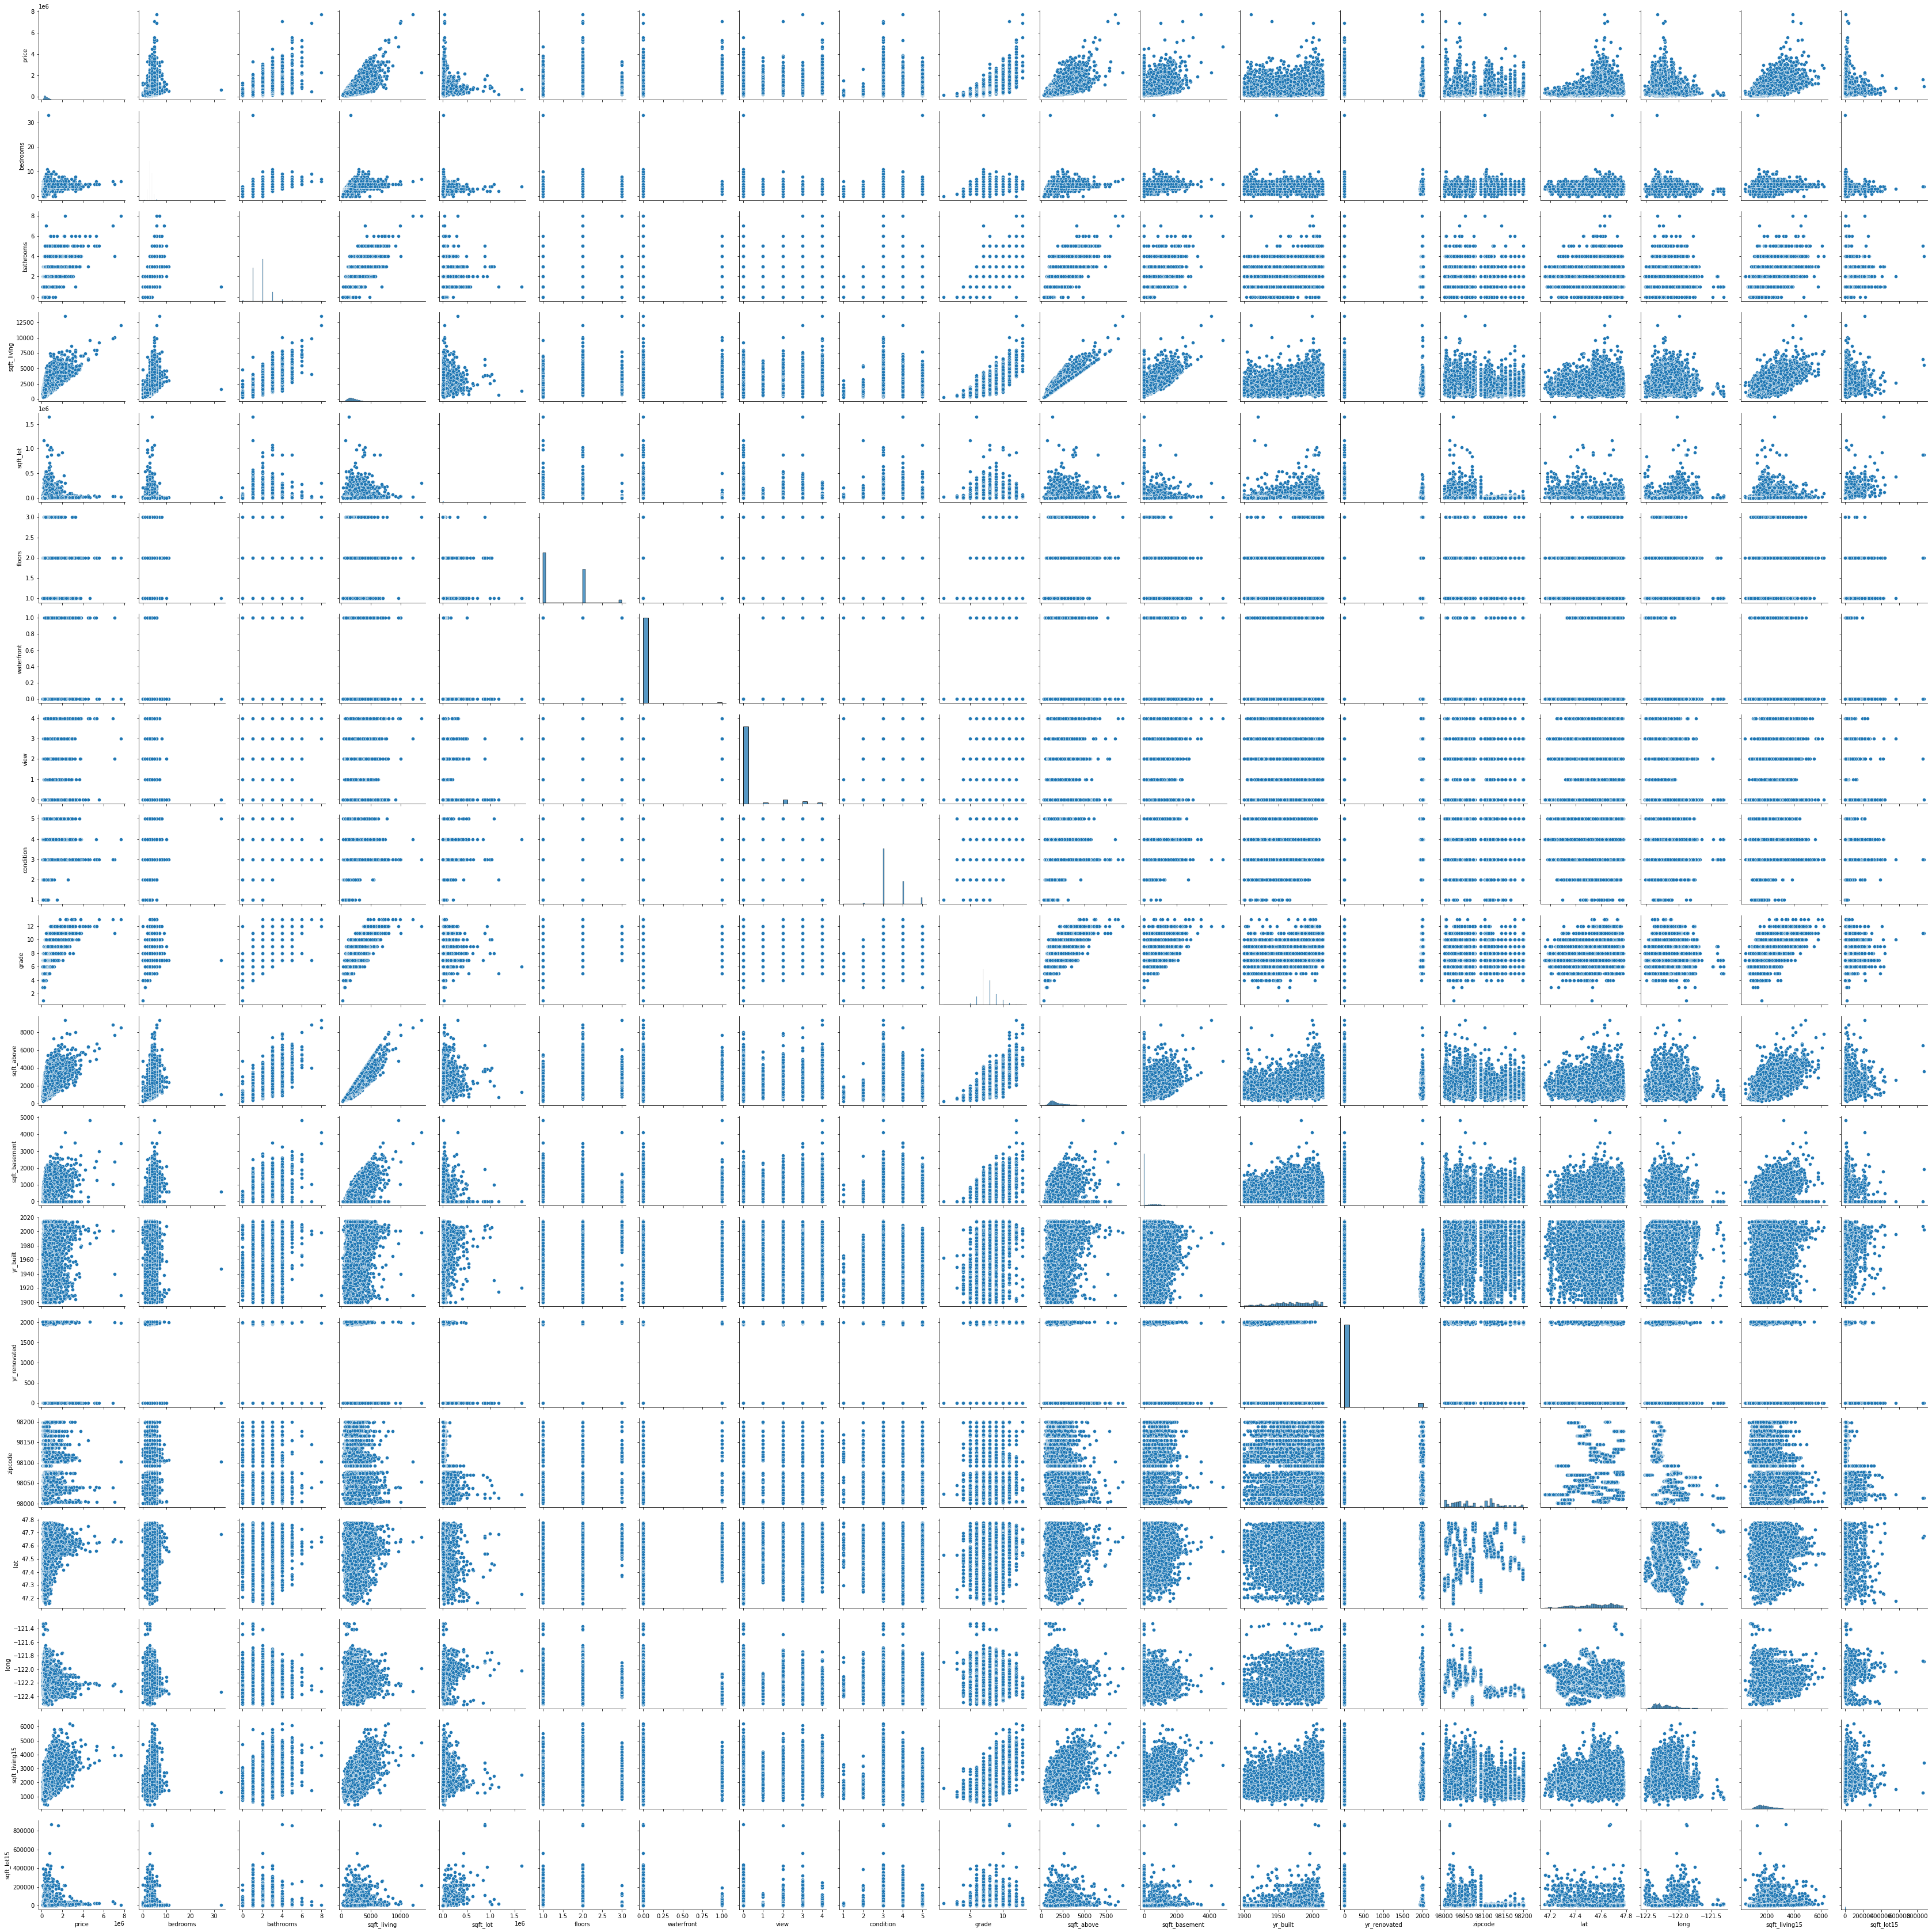

In [24]:
sns.pairplot(hass, hue = None)

In [25]:
#Plotting a correlation matrix
hass.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.058799,0.177497,-0.125962,0.606661,0.639963,0.250920,0.433608,0.060698,-0.159755,0.031385,0.179387,0.510106,0.080794
sqft_living,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.019654,0.024528,-0.293188,0.472577,0.517903,-0.235802,0.578663,-0.007979,-0.096645,0.029543,0.158923,0.296537,-0.013232
waterfront,0.266332,-0.006583,0.058799,0.103820,0.021601,0.019654,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.177497,0.284641,0.074753,0.024528,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.606661,0.762719,0.113644,0.472577,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265


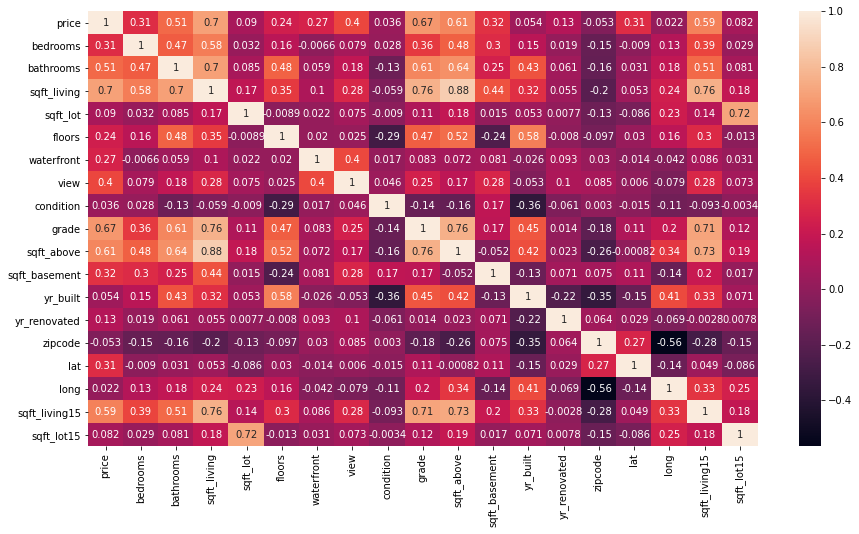

In [26]:
#Plotting a heatmap
plt.figure(figsize = (15,8))
sns.heatmap(hass.corr(),annot= True)
plt.show()

##7.Implementing the Solution

### Multiple Linear Regression

In [27]:
#Preparing the Data
#We will divide our dataset into attributes and labels

X = hass.drop(columns=['price','condition','sqft_lot15','sqft_lot'],axis = 1)
y = hass['price']

In [28]:
# Dividing our data into training and test sets


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
correlations= hass.drop(columns=['price','condition','sqft_lot15','sqft_lot'],axis = 1).corr()
correlations

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
bedrooms,1.000000,0.467519,0.576674,0.155663,-0.006583,0.079433,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633
bathrooms,0.467519,1.000000,0.697914,0.484886,0.058799,0.177497,0.606661,0.639963,0.250920,0.433608,0.060698,-0.159755,0.031385,0.179387,0.510106
sqft_living,0.576674,0.697914,1.000000,0.353327,0.103820,0.284641,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420
floors,0.155663,0.484886,0.353327,1.000000,0.019654,0.024528,0.472577,0.517903,-0.235802,0.578663,-0.007979,-0.096645,0.029543,0.158923,0.296537
waterfront,-0.006583,0.058799,0.103820,0.019654,1.000000,0.401993,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469
view,0.079433,0.177497,0.284641,0.024528,0.401993,1.000000,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404
grade,0.357003,0.606661,0.762719,0.472577,0.082785,0.251378,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208
sqft_above,0.477619,0.639963,0.876600,0.517903,0.072080,0.167659,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.261163,-0.000823,0.343791,0.731870
sqft_basement,0.303077,0.250920,0.435054,-0.235802,0.080585,0.276996,0.168443,-0.051923,1.000000,-0.133062,0.071320,0.074781,0.110535,-0.144743,0.200367
yr_built,0.154276,0.433608,0.318099,0.578663,-0.026159,-0.053229,0.446966,0.423922,-0.133062,1.000000,-0.224729,-0.346808,-0.148099,0.409395,0.326298


In [30]:
#Calculating the VIF Scores
vif=pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
bedrooms,1.603004,-0.291487,-7.967576e-01,0.062135,0.060982,0.117288,0.274257,-1.966465e-01,-1.497800e-01,0.057374,0.035430,0.091247,0.037675,0.054164,0.029980
bathrooms,-0.291487,2.410539,-1.670117e+00,-0.511204,0.016803,-0.036574,-0.159161,5.060624e-01,8.835663e-02,-0.418171,-0.154736,0.008336,-0.024018,0.067852,0.152815
sqft_living,-0.793224,-1.671157,1.816986e+13,-0.030295,-0.075526,0.020083,-1.717434,-1.638231e+13,-8.755488e+12,0.995860,0.263543,-0.057445,0.140112,-0.063369,-1.443857
floors,0.062135,-0.511204,-3.267057e-02,2.155144,-0.002983,-0.038357,-0.248980,-4.423935e-01,5.674615e-01,-0.921027,-0.150403,-0.160665,-0.150184,0.214374,0.211900
waterfront,0.060982,0.016803,-7.598624e-02,-0.002983,1.203560,-0.492510,0.048420,-4.526720e-02,3.128290e-02,-0.018619,-0.064695,0.023851,0.009375,0.029763,0.054429
view,0.117288,-0.036574,2.098216e-02,-0.038357,-0.492510,1.431342,-0.187290,3.981451e-04,-2.760526e-01,0.167346,-0.035191,-0.138331,0.124456,0.056324,-0.320218
grade,0.274257,-0.159161,-1.725505e+00,-0.248980,0.048420,-0.187290,3.395433,-1.020373e-01,3.076107e-01,-0.626332,-0.067739,0.091119,-0.331642,0.398200,-0.895567
sqft_above,-0.196977,0.503934,-1.638231e+13,-0.444817,-0.045729,0.001280,-0.108498,1.477063e+13,7.894127e+12,-0.476340,-0.267331,-0.029779,0.067807,-0.368828,-0.220074
sqft_basement,-0.150821,0.088370,-8.755488e+12,0.565875,0.031079,-0.275647,0.304102,7.894127e+12,4.218997e+12,-0.387822,-0.160527,-0.018847,-0.139317,0.154947,0.204972
yr_built,0.057374,-0.418171,1.001398e+00,-0.921027,-0.018619,0.167346,-0.626332,-4.813341e-01,-3.904911e-01,2.248523,0.441472,0.214169,0.292469,-0.519270,0.025176


In [31]:
# Training the Algorithm

# To train the algorithm we use the fit() method of the LinearRegression class

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(regressor.coef_)

[-3.47367995e+04  5.03689455e+04  1.08949336e+02  8.73418127e+02
  6.45455683e+05  5.31231948e+04  9.67623794e+04  6.60634762e+01
  4.28858600e+01 -2.79415958e+03  1.23584169e+01 -6.28201370e+02
  5.97761897e+05 -2.22717720e+05  2.37859411e+01]


In [33]:
# Making Predictions

# To make pre-dictions on the test data, execute the following

y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9790,680200,675319.530873
10280,550000,510032.556590
21572,230000,235025.729753
20060,379950,449687.673162
21204,1060000,831449.856535
...,...,...
17762,300000,230876.700429
13211,395000,630003.871230
8108,395000,527921.644501
19728,489000,509310.645602


In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125788.83783682711
Mean Squared Error: 38261368825.23338
Root Mean Squared Error: 195605.1349664251


Let's now plot our residual plot for this regression

In [35]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-3166.884390404555

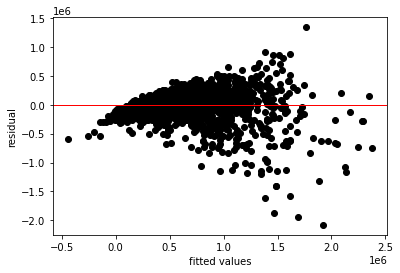

In [36]:
#Plotting residual plots

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [37]:
#Performing Bartlett's Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [38]:
from sklearn.metrics import r2_score
from sklearn import metrics
y_pred= regressor.predict(X_test)
accuracy= r2_score(y_test,y_pred)
print(accuracy)

0.708862318832199


This multiple linear regression model gives us an accuracy score of 70.88%. We will use it as our baseline model to compare it to all the other regression methods and comeup with the best model for this kind of a dataset.

###Quantile Regression

In [39]:
# We will use the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living +view + grade + lat + long + sqft_above+ sqft_living15', hass)

res = mod.fit(q = .5)

# Then print out the summary of our model
#
print(res.summary())

# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4331
Model:                       QuantReg   Bandwidth:                   2.072e+04
Method:                 Least Squares   Sparsity:                    2.690e+05
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        09:58:54   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.698e+07   9.08e+05    -40.728      0.000   -3.88e+07   -3.52e+07
bedrooms      -1.702e+04   1239.865    -13.723      0.000   -1.94e+04   -1.46e+04
bathrooms      6029.6037   1789.860      3.369      0.001    2521.345    9537.862
sqft_living     124.6841      2.645  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [41]:
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + view + grade + lat + long + sqft_above+ sqft_living15', hass)

res = mod.fit(q = .25)

# Then print out the summary of our model
#
print(res.summary())

# These are the parameters for the 0.25th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3865
Model:                       QuantReg   Bandwidth:                   1.947e+04
Method:                 Least Squares   Sparsity:                    2.697e+05
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        09:58:57   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.886e+06   8.73e+05     -4.453      0.000    -5.6e+06   -2.18e+06
bedrooms      -1.278e+04   1027.243    -12.446      0.000   -1.48e+04   -1.08e+04
bathrooms      1.213e+04   1561.108      7.769      0.000    9068.925    1.52e+04
sqft_living      86.4956      2.332  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [42]:
mod = smf.quantreg('price ~ bedrooms + bathrooms + view + sqft_living + grade + lat + long + sqft_above+ sqft_living15', hass)

res = mod.fit(q = .75)

# Then print out the summary of our model
#
print(res.summary())

# These are the parameters for the 0.75th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4621
Model:                       QuantReg   Bandwidth:                   1.992e+04
Method:                 Least Squares   Sparsity:                    3.971e+05
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        09:59:00   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.699e+07   1.27e+06    -36.950      0.000   -4.95e+07   -4.45e+07
bedrooms      -1.807e+04   1832.967     -9.860      0.000   -2.17e+04   -1.45e+04
bathrooms     -5745.4157   2376.675     -2.417      0.016   -1.04e+04   -1086.957
view           1.125e+05   1697.364  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [43]:
quantiles = [0.25,0.5,0.75] 
models = []
params = []

# We build models for each quantile in our list quantiles 
# we also store the model parameters in a list called params. 
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + view + grade + lat + long + sqft_above+ sqft_living15', hass)
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms'], res.params['bathrooms'], res.params['sqft_living'], res.params['view'],res.params['grade'], res.params['lat'],res.params['long'],res.params['sqft_above'],res.params['sqft_living15']])
# Lastly we make a dataframe of
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['quantiles', 'intercept','bedrooms_coef','bathrooms_coef','sqft_living_coef','view_coef','grade_coef','lat_coef','long_coef','sqft_above_coef','sqft_living15_coef'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


,quantiles,intercept,bedrooms_coef,bathrooms_coef,sqft_living_coef,view_coef,grade_coef,lat_coef,long_coef,sqft_above_coef,sqft_living15_coef
0,0.25,-3.885755e+06,-12784.554504,12128.812979,86.495551,53311.575416,56573.150377,447514.165876,144143.616584,-5.008347,21.277005
1,0.50,-3.697677e+07,-17015.156346,6029.603734,124.684085,75570.474736,61374.494229,603698.758983,-65722.346857,-6.177664,24.639512
2,0.75,-3.593343e+07,-26096.414867,-27344.696889,197.368412,108910.721721,66232.045695,752966.819962,645.769119,-24.520357,15.666464


We get Pseudo R Squared values of 43.3%, 38.65% and 46.21% for the 25th, 50th and 75th percentiles respectively which is quite low. Let's try other regression techniques.

###Lasso Regression

In [44]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = hass.drop('price' ,axis  =1)
y = hass['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [45]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.7017634151098266
lasso MSE: 40252213991.176895
lasso coef: [-33063.09190544  37285.3603197  255948.39688055   5028.94892758
   1235.41950171  50592.24311712  40497.55464119  17824.41732621
 113230.55059443 -83281.72019649 -58133.52182441 -75663.52823491
   7945.23550504 -31333.37390894  83638.94846772 -29819.95229753
  15824.07278415 -10417.93632861]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26905137220724.75, tolerance: 291664533601.623
  positive)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7064365853103604
linear score: 0.7064533746070266
lasso MSE: 39922278721.122116
linear MSE: 39919995510.92799
lasso best estimator coef: [-33561.39291158  36295.66329889 205397.73235448   4939.45423336
   2226.87412807  46050.09498562  42318.12391781  17039.54381642
 112829.88688028 -35922.73029174 -31271.28506886 -75432.9358019
   6482.66368608 -31723.76317826  84411.92455552 -28694.61666007
  12582.25115595 -10253.37993327]
linear coef: [-33579.6854784   36405.71283741  81675.32591884   5014.58833052
   2244.59720508  46066.51293506  42316.79317283  17070.61569658
 112773.33022204  75484.62788482  28258.38491155 -75460.07258717
   6504.52830661 -31785.23910375  84445.94345122 -28752.29551882
  12727.78756232 -10320.50395241]


We get an accuracy score of 70.64% with lasso regression.

###Ridge Regression

In [47]:
X = hass.drop('price' ,axis  =1)
y = hass['price']

In [48]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [50]:
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

In [51]:
abs(search.best_score_) 

40752115657.23673

In [52]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40286482848.7753


In [53]:
from sklearn.metrics import r2_score
from sklearn import metrics
y_pred= ridge.predict(X_test)
accuracy= r2_score(y_test,y_pred)
print(accuracy)

0.7063843052857537


In [54]:
regression = LinearRegression()
regression.fit(X,y)

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, hass.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 80380.54179264072,
 'bedrooms': 37289.972426964116,
 'condition': 113228.16899507304,
 'floors': 50593.0124740894,
 'grade': 75007.85134054128,
 'lat': -29822.43144020223,
 'long': 15830.170378560704,
 'price': -33063.86271277722,
 'sqft_above': 26463.472093201955,
 'sqft_basement': -75664.66368627583,
 'sqft_living': 5032.172316938912,
 'sqft_living15': -10420.764665297265,
 'sqft_lot': 1236.160831261457,
 'view': 17825.706557743026,
 'waterfront': 40497.49292566186,
 'yr_built': 7946.1409762006715,
 'yr_renovated': -31335.968035622296,
 'zipcode': 83640.37620626747}

With ridge regression, we get an accuracy score of 70.63% which is the highest so far.

###Elastic Net Regression

In [55]:
X = hass.drop('price' ,axis  =1)
y = hass['price']

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [57]:
search.fit(X,y)
search.best_params_

In [58]:
abs(search.best_score_)

40795257039.84447

In [59]:
elastic=ElasticNet(normalize=True,alpha= 1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

6.842151028141695e+18


In [60]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 36019.04704856456,
 'bedrooms': -30150.526496013168,
 'condition': 17664.76207434241,
 'floors': 2692.671146878439,
 'grade': 106537.30840738707,
 'lat': 82419.56564717207,
 'long': -28011.78950402097,
 'sqft_above': 72596.45502691547,
 'sqft_basement': 28093.651871358667,
 'sqft_living': 79058.23555071269,
 'sqft_living15': 18486.3626759508,
 'sqft_lot': 4809.146584451474,
 'sqft_lot15': -9454.146791553729,
 'view': 42236.71157557371,
 'waterfront': 45070.33579106236,
 'yr_built': -69765.57970346029,
 'yr_renovated': 7836.8685893328,
 'zipcode': -28231.945519355682}

In [61]:
from sklearn.metrics import r2_score
from sklearn import metrics
y_pred= elastic.predict(X_test)
accuracy= r2_score(y_test,y_pred)
print(accuracy)

0.7059293443965524


We get an accuracy score of 70.59% with ElasticNet Regression model.

##8.Follow up Questions

###a)Did we have the right data?

Yes we did. It gave us quite good accuracy scores. It was adequate for our prediction models.

###b)Do we need other data to answer our question?

No we did not. It was quite 

###c)Did we have the right question?

Yes we did. 

##9.Recommendations

Given the accuracy scores of our different models, the multiple linear regression seems to give us the highest  of 70.88% so I would recommend this type of model to predict the future prices of the houses.  
The variables that mostly affect the prices are bathrooms, square feet of the living area, square feet above and the grades of the houses so they should give alot of attention to these when determining or predicting the prices of the houses they deal with.